In [18]:
import numpy as np
import matplotlib.pyplot as plt

class Model(object):
    """
     Ridge Regression with Tikhonov regularization
    """

    def fit(self, X, y, alpha=0):

        I = alpha * np.eye(X.shape[1])
        self.beta = np.dot(np.linalg.inv(np.dot(X.T, X) + I), np.dot(X.T, y))

    def predict(self, X):
        out=np.dot(X, self.beta)
        return out

    def validate(self, X, y):

        ypred = self.predict(X)
        return np.sqrt(np.mean((y-ypred)**2))

optimal alpha:  0.001
minimum of rmse:  2.3539417175287913


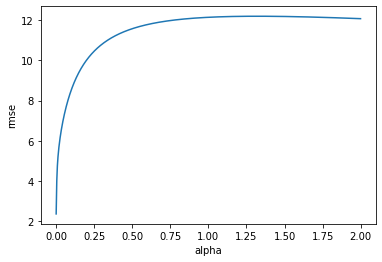

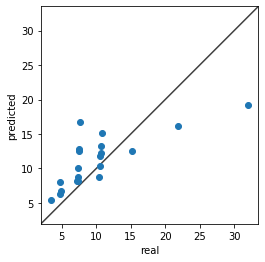

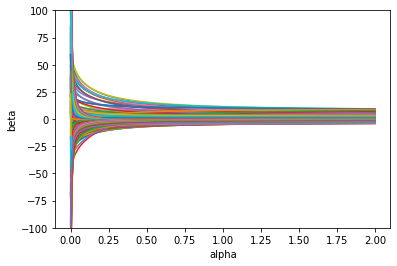

In [20]:
X_train_path = "./Xtraining.csv"
y_train_path = "./Ytraining.csv"
X_val_path = "./Xvalidation.csv"
y_val_path = "./Yvalidation.csv"
X_test_path = "./Xtesting.csv"
y_test_path = "./Ytesting.csv"

#Train Data
X_train = np.genfromtxt(X_train_path, delimiter=',')
y_train = np.genfromtxt(y_train_path, delimiter=',')

# Validation Data
X_val = np.genfromtxt(X_val_path, delimiter=',')
y_val = np.genfromtxt(y_val_path, delimiter=',')

# Test Data
X_test = np.genfromtxt(X_test_path, delimiter=',')
y_test = np.genfromtxt(y_test_path, delimiter=',')

#tune regularization parameter
rmse_list = []
alpha_list = np.arange(0.001, 2.000, 0.002)

p = X_train.shape[1]
beta_list_2 = [[] for x in range(p)]
beta_list = [[] for x in range(p)]

m = Model()
for i in range(len(alpha_list)):
    m.fit(X_train, y_train, alpha_list[i])
    rmse_list.append(m.validate(X_val, y_val))
    [x.append(y) for x, y in zip(beta_list, m.beta)]

rmse_list = np.array(rmse_list)
min_index = np.argmin(rmse_list)
print("optimal alpha: ", alpha_list[min_index])
print("minimum of rmse: ", rmse_list[min_index])

# plottting labda vs rmse
plt.plot(alpha_list, rmse_list, '-')
plt.ylabel('rmse')
plt.xlabel('alpha')
plt.show()

# plotting predicted vs real value
m.fit(X_train, y_train, alpha_list[min_index])
ypred = m.predict(X_test)

fig, ax = plt.subplots()
plt.ylabel('predicted')
plt.xlabel('real')
ax.scatter(y_test, ypred)
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)
plt.show()

# plot regression coefficients
fig, ax = plt.subplots()
for i in range(p):
    plt.plot(alpha_list, beta_list[i])

ax.set_ylim([-100, 100])
plt.ylabel('beta')
plt.xlabel('alpha')
plt.show()

